## Business Question 2 - Price trend by neighbourhood

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
listings_df = pd.read_csv('./Seattle/listings.csv')
listings_df.shape
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [12]:
# convert price column to numeric
listings_df['price'] =  pd.to_numeric(listings_df['price'].str.replace('[\$,]', '', regex=True))

In [13]:
neighbourhood_vals = listings_df['neighbourhood_group_cleansed'].value_counts()
neighbourhood_vals

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

We can see Capitol Hill and Downtown have the highest number of listings.

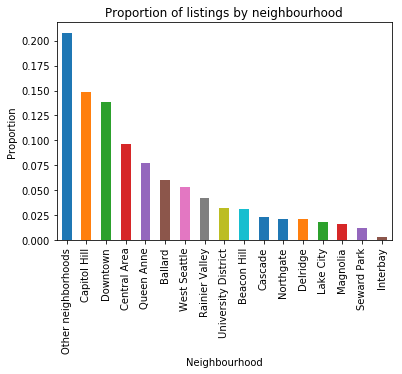

In [14]:
(neighbourhood_vals/listings_df.shape[0]).plot(kind='bar')
plt.title('Proportion of listings by neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Proportion')
plt.savefig('proportion by neighbourhood.png', bbox_inches = 'tight')

In [15]:
neighbourhood_groups = listings_df.groupby(by='neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
neighbourhood_groups

neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price, dtype: float64

In [16]:
listings_df.groupby(by='neighbourhood_group_cleansed')['price'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Magnolia,61.0,177.672131,150.078726,30.0,78.0,129.0,225.00,950.0
Queen Anne,295.0,157.223729,115.863385,20.0,95.0,119.0,175.00,975.0
Downtown,530.0,154.405660,90.902800,35.0,105.0,139.0,175.00,999.0
West Seattle,203.0,141.359606,89.147801,30.0,79.0,109.0,195.00,495.0
Cascade,89.0,140.101124,112.179042,42.0,88.0,115.0,141.00,775.0
Capitol Hill,567.0,130.592593,92.442331,22.0,80.0,105.0,150.00,750.0
Central Area,369.0,128.338753,80.260558,35.0,75.0,100.0,155.00,500.0
Ballard,230.0,124.682609,87.925033,25.0,70.0,95.0,149.00,475.0
Other neighborhoods,794.0,119.968514,86.580450,25.0,66.0,99.0,145.00,1000.0


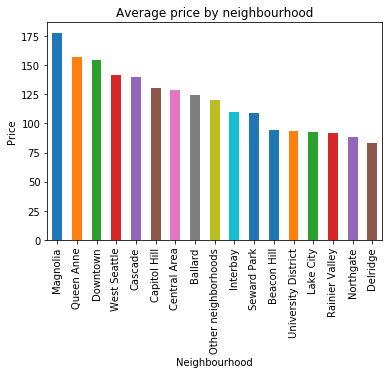

In [17]:
neighbourhood_groups.plot(kind='bar')
plt.title('Average price by neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.savefig('price by neighbourhood.png', bbox_inches = 'tight')

We can see the 5 most expensive neighbourhoods in Seattle as per the average price are Magnolia, Queen Anne, Downtown, West Seattle and Cascade.

Let's also take a look at the box plot of prices by neighbourhood.

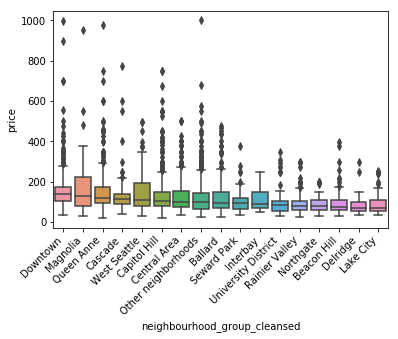

In [18]:
sort_order = listings_df.groupby('neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='neighbourhood_group_cleansed', data=listings_df, order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Prices greater than 600 are outliers. Let's plot again with only prices upto $600.

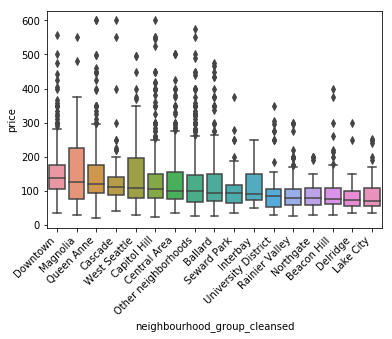

In [20]:
sort_order = listings_df.query('price <= 600').groupby('neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='neighbourhood_group_cleansed', data=listings_df.query('price <= 600'), order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig('neighbourhood boxplot.png', bbox_inches = 'tight')
plt.show()

We can see from above analysis the most expensive neighbourhoods are Downtown, Magnolia, Queen Anne, Cascade and West Seattle.

We also saw the neighbourhoods with maximum number of listings are Capitol Hill and Downtown.

So as per the above analysis, Capitol Hill has high number of listings, and the average price is low. Hence there should be quite a few options for budget travellers in Capitol Hill neighbourhood.